# Loan Payments Data

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/Ferid/Veri_Bilimi/Loan payments data.csv')
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Loan_ID         500 non-null    object 
 1   loan_status     500 non-null    object 
 2   Principal       500 non-null    int64  
 3   terms           500 non-null    int64  
 4   effective_date  500 non-null    object 
 5   due_date        500 non-null    object 
 6   paid_off_time   400 non-null    object 
 7   past_due_days   200 non-null    float64
 8   age             500 non-null    int64  
 9   education       500 non-null    object 
 10  Gender          500 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 43.1+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Principal,500.0,943.200,115.240274,300.0,1000.0,1000.0,1000.0,1000.0
terms,500.0,22.824,8.000064,7.0,15.0,30.0,30.0,30.0
past_due_days,200.0,36.010,29.380880,1.0,3.0,37.0,60.0,76.0
age,500.0,31.116,6.084784,18.0,27.0,30.0,35.0,51.0


In [5]:
df.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

In [6]:
df.nunique()

Loan_ID           500
loan_status         3
Principal           6
terms               3
effective_date      7
due_date           25
paid_off_time     320
past_due_days      33
age                33
education           4
Gender              2
dtype: int64

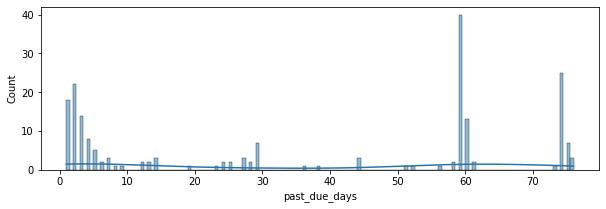

In [7]:
plt.figure(figsize=[10,3])
sns.histplot(x = 'past_due_days', data=df, kde=True, bins=150);

In [8]:
df[df.past_due_days.isnull()]

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female
...,...,...,...,...,...,...,...,...,...,...,...
295,xqd20160296,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 13:00,NaN,30,college,female
296,xqd20160297,PAIDOFF,800,15,9/14/2016,9/28/2016,9/21/2016 4:42,NaN,27,college,male
297,xqd20160298,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,29,High School or Below,male
298,xqd20160299,PAIDOFF,1000,30,9/14/2016,10/13/2016,10/13/2016 9:00,NaN,40,High School or Below,male


In [9]:
df.past_due_days.fillna(0,inplace=True)

In [10]:
df.nunique()

Loan_ID           500
loan_status         3
Principal           6
terms               3
effective_date      7
due_date           25
paid_off_time     320
past_due_days      34
age                33
education           4
Gender              2
dtype: int64

In [11]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,0.0,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,0.0,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,0.0,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,0.0,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,0.0,28,college,female


In [12]:
df.drop('effective_date',axis=1, inplace=True)
df.drop('due_date', axis=1, inplace=True)
df.drop('paid_off_time', axis=1, inplace=True)
df.drop('Loan_ID', axis=1, inplace=True)

In [13]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,PAIDOFF,1000,30,0.0,45,High School or Below,male
1,PAIDOFF,1000,30,0.0,50,Bechalor,female
2,PAIDOFF,1000,30,0.0,33,Bechalor,female
3,PAIDOFF,1000,15,0.0,27,college,male
4,PAIDOFF,1000,30,0.0,28,college,female


In [14]:
df.isnull().sum()

loan_status      0
Principal        0
terms            0
past_due_days    0
age              0
education        0
Gender           0
dtype: int64

In [15]:
df.corr()

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,0.027682,-0.092613
terms,0.534302,1.000000,0.031007,-0.074259
past_due_days,0.027682,0.031007,1.000000,-0.038014
age,-0.092613,-0.074259,-0.038014,1.000000


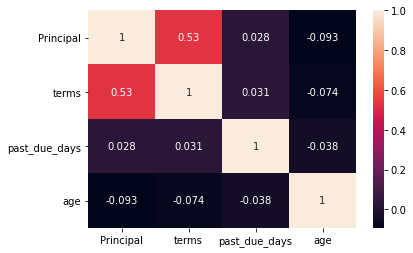

In [16]:
sns.heatmap(df.corr(), annot=True);

## PreProcessing

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.terms = le.fit_transform(df.terms)
df.loan_status = df.loan_status.replace(['PAIDOFF', 'COLLECTION', 'COLLECTION_PAIDOFF'],[0,1,2])
df.education = df.education.replace(['High School or Below', 'Bechalor', 'college', 'Master or Above'],[0,2,1,3])
df.past_due_days=df.past_due_days.astype('int64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   loan_status    500 non-null    int64
 1   Principal      500 non-null    int64
 2   terms          500 non-null    int64
 3   past_due_days  500 non-null    int64
 4   age            500 non-null    int64
 5   education      500 non-null    int64
 6   Gender         500 non-null    int32
dtypes: int32(1), int64(6)
memory usage: 25.5 KB


In [20]:
df.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1000,2,0,45,0,1
1,0,1000,2,0,50,2,0
2,0,1000,2,0,33,2,0
3,0,1000,1,0,27,1,1
4,0,1000,2,0,28,1,0


## First Modeling

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [22]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:
models = [LogisticRegression,
          KNeighborsClassifier,
          SVC,
          MLPClassifier,
          DecisionTreeClassifier,
          RandomForestClassifier,
          GradientBoostingClassifier,
          XGBClassifier,
          LGBMClassifier,
          CatBoostClassifier]

In [27]:
Score_accuracy=[]
Score_f1=[]
ModelName=[]


for model in models:
    alg = model().fit(X_train,y_train)
    y_pred = alg.predict(X_test)
    Score_accuracy.append((accuracy_score(y_test, y_pred))*100)
    Score_f1.append((f1_score(y_test, y_pred, average='weighted'))*100)
    ModelName.append(model.__name__)
    Results = pd.DataFrame({'ModelName':ModelName, 'Score_accuracy':Score_accuracy, 'Score_f1':Score_f1})

[18:12:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.075266
0:	learn: 0.9899296	total: 157ms	remaining: 2m 36s
1:	learn: 0.8842948	total: 159ms	remaining: 1m 19s
2:	learn: 0.8097828	total: 160ms	remaining: 53.3s
3:	learn: 0.7449874	total: 162ms	remaining: 40.4s
4:	learn: 0.6942463	total: 164ms	remaining: 32.6s
5:	learn: 0.6354826	total: 166ms	remaining: 27.5s
6:	learn: 0.5889643	total: 168ms	remaining: 23.8s
7:	learn: 0.5438941	total: 169ms	remaining: 21s
8:	learn: 0.5022175	total: 171ms	remaining: 18.8s
9:	learn: 0.4685320	total: 173ms	remaining: 17.1s
10:	learn: 0.4415014	total: 174ms	remaining: 15.7s
11:	learn: 0.4179160	total: 176ms	remaining: 14.5s
12:	learn: 0.3893508	total: 178ms	remaining: 13.5s
13:	le

In [28]:
Results

,ModelName,Score_accuracy,Score_f1
0,LogisticRegression,98.4,98.395037
1,KNeighborsClassifier,94.4,94.079707
2,SVC,54.4,38.333679
3,MLPClassifier,85.6,82.699491
4,DecisionTreeClassifier,98.4,98.395037
5,RandomForestClassifier,96.8,96.772000
6,GradientBoostingClassifier,97.6,97.586555
7,XGBClassifier,96.8,96.772000
8,LGBMClassifier,96.8,96.772000
9,CatBoostClassifier,97.6,97.586555


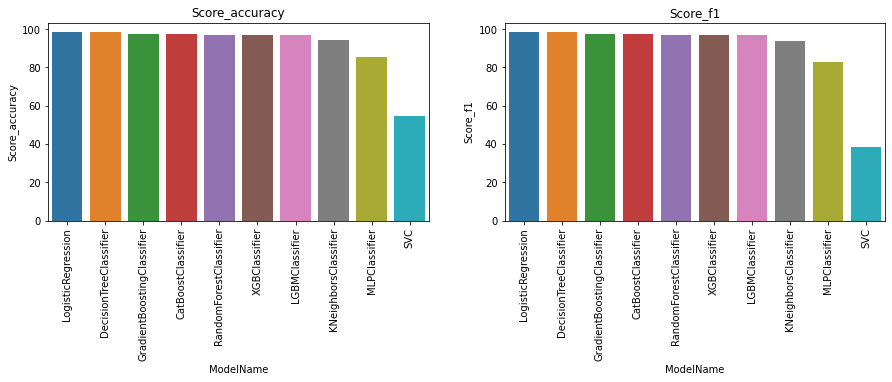

In [29]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
sns.barplot(x='ModelName',y='Score_accuracy',data=Results.sort_values('Score_accuracy',ascending=False))
plt.title('Score_accuracy')
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x='ModelName',y='Score_f1',data=Results.sort_values('Score_f1',ascending=False))
plt.title('Score_f1')
plt.xticks(rotation=90);

## Hyperparameter Optimization

In [30]:
Score_accuracy=[]
Score_f1=[]
ModelName=[]


def ML(alg):
    if alg==LogisticRegression:
        tuned = alg(solver='liblinear').fit(X_train, y_train)
    elif alg==KNeighborsClassifier:
        model=alg()
        params = {'n_neighbors':np.arange(1,25)}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==SVC:
        model=alg()
        params = {'C': np.arange(1,10), 'kernel': ['linear', 'rbf']}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==MLPClassifier:
        model=alg()
        params = {'alpha': [1,0.1,0.01,0.03,0.005,0.0001],'hidden_layer_sizes': [(10,10),(100,100),(3,5)]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==DecisionTreeClassifier:
        model=alg()
        params = {'max_depth':[3,5,8],'min_samples_split':[2,5,10,20]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==RandomForestClassifier:
        model=alg()
        params = {'n_estimators': [100,200,500],'max_features':[3,5,8],'min_samples_split':[3,8]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==GradientBoostingClassifier:
        model=alg()
        params = {'learning_rate':[0.1, 0.01, 0.001],'n_estimators': [100,300,500],'max_depth': [2,3,5]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==XGBClassifier:
        model=alg()
        params = {'n_estimators':[100,500],'subsample':[0.6,0.8],'max_depth': [3,5,7],'learning_rate':[0.1,0.01,0.001]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==LGBMClassifier:
        model=alg()
        params = {'learning_rate':[0.001,0.01,0.1],'n_estimators':[200,500,1000],'max_depth':[2,3,8]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
    elif alg==CatBoostClassifier:
        model=alg()
        params = {'iterations':[200,500],'learning_rate':[0.01,0.03],'depth':[4,8]}
        tuned = alg(**(GridSearchCV(model,params,cv=5,n_jobs=-1).fit(X_train, y_train)).best_params_).fit(X_train, y_train)
        
    ModelName.append(alg.__name__)
    Score_f1.append(f1_score(y_test, tuned.predict(X_test), average='weighted'))
    Score_accuracy.append(accuracy_score(y_test, tuned.predict(X_test)))

In [31]:
for i in models:
    ML(i)

[18:22:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:22:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0:	learn: 1.0493933	total: 1.26ms	remaining: 630ms
1:	learn: 1.0042249	total: 2.49ms	remaining: 621ms
2:	learn: 0.9641020	total: 3.66ms	remaining: 606ms
3:	learn: 0.9286083	total: 4.91ms	remaining: 609ms
4:	learn: 0.8936020	total: 6.05ms	remaining: 599ms
5:	learn: 0.8617064	total: 7.05ms	remaining: 581ms
6:	learn: 0.8285273	total: 8.15ms	remaining: 574ms
7:	learn: 0.7961943	t

In [32]:
Results_best = pd.DataFrame({'ModelName':ModelName, 'Score_f1':Score_f1, 'Score_accuracy':Score_accuracy})
Results_best

,ModelName,Score_f1,Score_accuracy
0,LogisticRegression,0.949830,0.952
1,KNeighborsClassifier,0.941089,0.944
2,SVC,0.983950,0.984
3,MLPClassifier,0.600582,0.600
4,DecisionTreeClassifier,0.983950,0.984
5,RandomForestClassifier,0.975866,0.976
6,GradientBoostingClassifier,0.975866,0.976
7,XGBClassifier,0.975866,0.976
8,LGBMClassifier,0.967720,0.968
9,CatBoostClassifier,0.967720,0.968


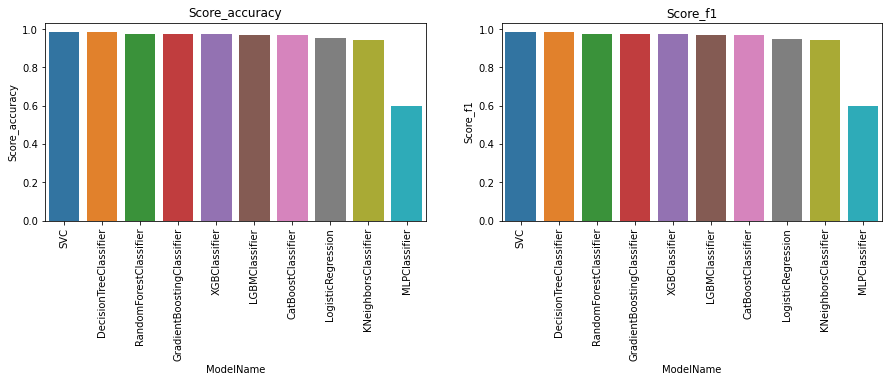

In [33]:
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
sns.barplot(x='ModelName',y='Score_accuracy',data=Results_best.sort_values('Score_accuracy',ascending=False))
plt.title('Score_accuracy')
plt.xticks(rotation=90);
plt.subplot(2,2,2)
sns.barplot(x='ModelName',y='Score_f1',data=Results_best.sort_values('Score_f1',ascending=False))
plt.title('Score_f1')
plt.xticks(rotation=90);